In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
import colormaps as cmaps
import os
import scipy as sp
from scipy.ndimage.interpolation import rotate
from magpie_data import PolarimetryMap2, FaradayMap2, NeLMap2, Interferogram, OpticalFrames
import scipy.constants as c
from mcerp import N, umath, Gamma
from bdots import *
import pickle
from matplotlib import rc

C:\Users\jdhare\Google Drive\MAGPIE\data\2017\s0215_17 Reconnection Al - Kz TS\s0215_17 12 frame


C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:329: RuntimeWarning: divide by zero encountered in log
  self.s_l=[np.log(s_im) for s_im in self.s_n]


<IPython.core.display.Javascript object>


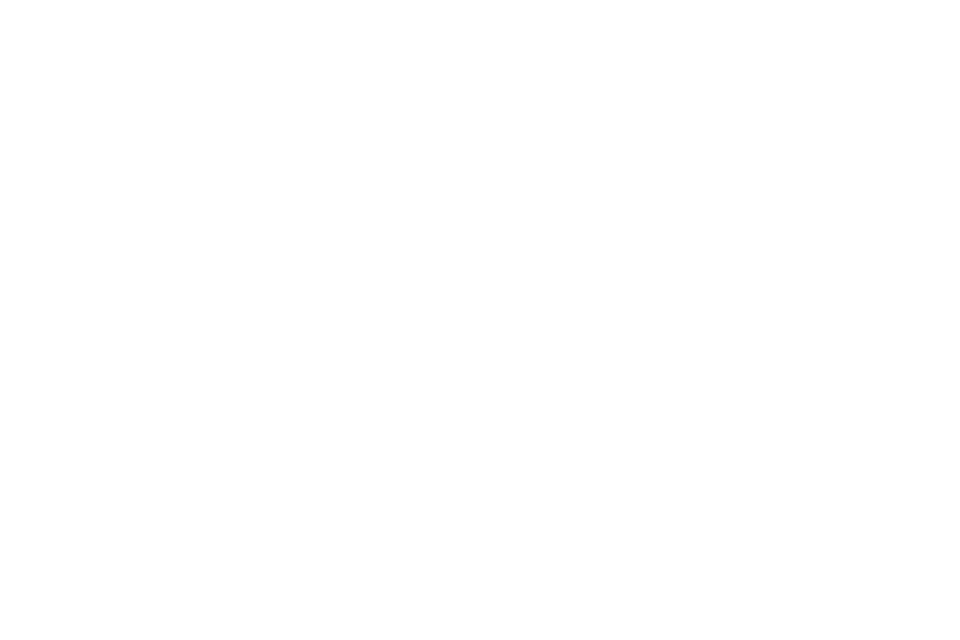

In [2]:
%cd "C:\Users\jdhare\Google Drive\MAGPIE\data\2017\s0215_17 Reconnection Al - Kz TS\s0215_17 12 frame"

s=OpticalFrames(160,20)
s.logarithm()
s.rotate(-90)
s.plot_rot(frame=2)

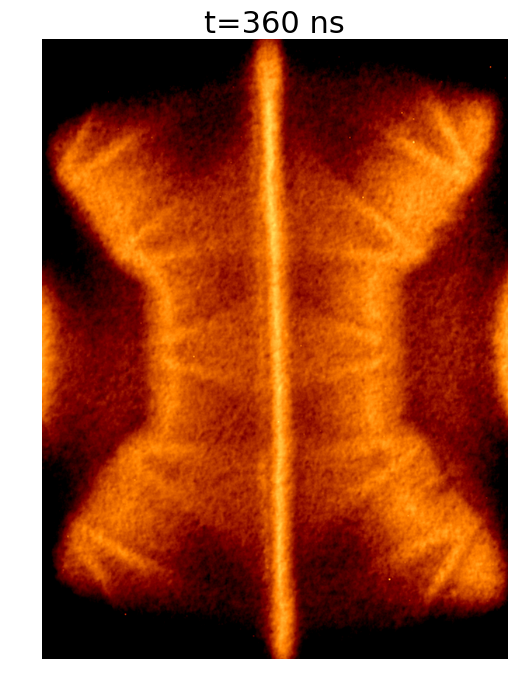

In [7]:
s.crop((465,406), xcrop=300, ycrop=400)
fig,ax=plt.subplots(figsize=(6,8))
s.plot_crop(ax=ax, frame=11, clim=[0.5,1.2])

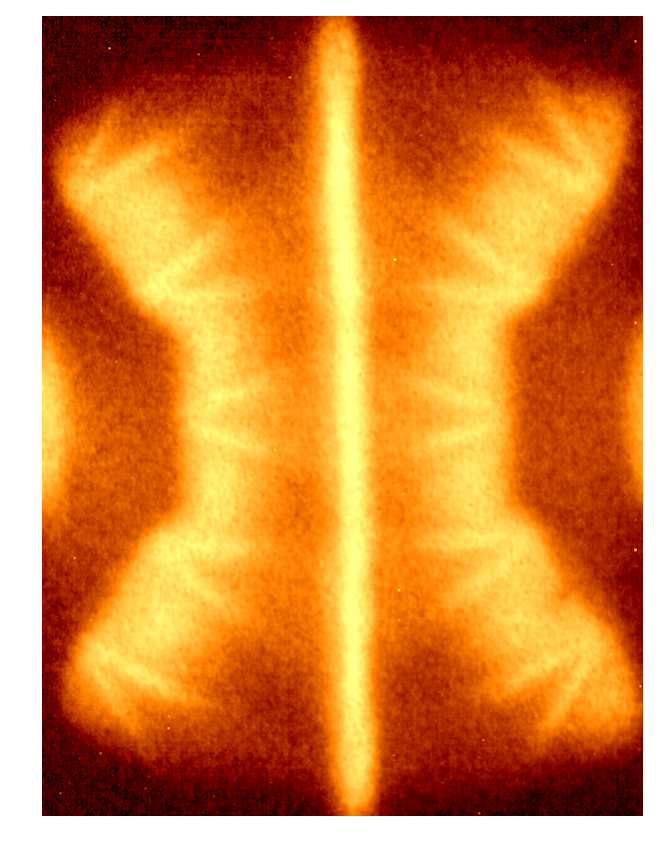

In [4]:
%matplotlib inline
s.save_gif(s.shot+' 12 frame',clim=[0,1.2])

In [8]:
%cd "~\Google Drive\MAGPIE\data\2015\s1006_15 Reconnection C TS upstream flow"

rot=-90
s1006_15_532=NeLMap2('s1006_15 532nm neL.txt', scale=173, rot_angle=rot, multiply_by=1/1.6)
s=s1006_15_532
s.set_origin(origin=(2305,1411), extent=[-11.5,11.5,-8,8])

C:\Users\jdhare\Google Drive\MAGPIE\data\2015\s1006_15 Reconnection C TS upstream flow


C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.data_c=self.data[ymin:ymax, xmin:xmax]


(3719, 882) (259, 882)
(3719, 1211) (259, 1211)


(-10, 10)

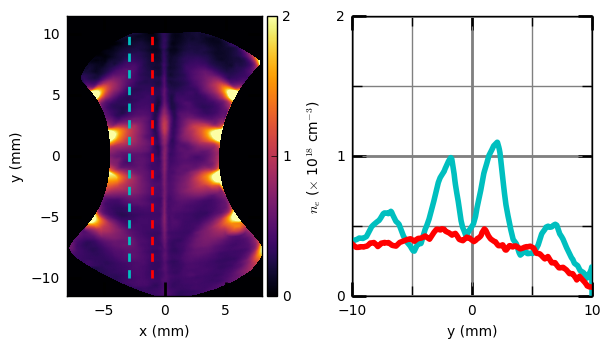

In [36]:
fig, ax=plt.subplots(1,2, figsize=(6, 3.5))
ax1=ax[0]
gim=s1006_15_532.plot_data_mm(ax=ax1, clim=[0,2], multiply_by=1e-18)

for x_mm in [-2.9,-1]:
    ax1.plot([x_mm,x_mm],[-10,10], lw=2, ls='dashed')
ax1.lines[0].set_color('c')
ax1.lines[1].set_color('red')


ax1.set_xlabel('x (mm)')
ax1.set_ylabel('y (mm)')
ax1.set_xticks([-5,0,5])

ax1.set_xlim([-8,8])
ax1.set_ylim([-11.5,11.5])


ax1.tick_params(labelsize=10, pad=5, length=10, width=2)


divider1 = make_axes_locatable(ax1)
cbar_ax1 = divider1.append_axes("right", size="5%", pad=0.05)
c=cbar_ax1
fig.colorbar(gim, cax=c, ticks=[0,1 ,2])
c.set_ylabel(r'$n_e$ ($\times$ 10$^{18}$ cm$^{-3}$)',fontsize=10, labelpad=10)

fig.subplots_adjust(top=0.95, bottom=0.15, left=0.08, right=0.98, wspace=0.25, hspace=0)

ax3=ax[1]
s=s1006_15_532

for x_mm in [-2.9,-1]:
    s.create_lineout(start=(-10,x_mm),end=(10,x_mm), lineout_width=10)
    s.plot_lineout(ax=ax3, label="x= "+str(x_mm)+" mm",multiply_by=1e-18)
    
ax3.lines[0].set_color('c')
ax3.lines[1].set_color('red')

ax3.set_xticks([-10,0,10])
ax3.xaxis.set_minor_locator(MultipleLocator(5))
ax3.set_ylim([0, 2])
ax3.set_yticks([0, 1,2])
ax3.yaxis.set_minor_locator(MultipleLocator(0.5))

ax3.grid(which='major', color='gray', linestyle='-', linewidth=2)
ax3.grid(which='minor', color='gray', linestyle='-', linewidth=1)
ax3.set_axisbelow(True)


ax3.tick_params(which='minor', pad=5, length=7, width=1)
ax3.tick_params( pad=5, length=10, width=2)

ax3.set_xlabel('y (mm)',fontsize=10)
ax3.set_xlim([-10,10])



In [37]:
th_folder=r'~\Google Drive\MAGPIE\conferences\mr2017'
fn='lineouts_inflow_density.png'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=400)